In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [35]:
dolphins_csvs = os.listdir('Dolphins_CSVs')
dolphins_dfs = [pd.read_csv('Dolphins_CSVs/'+csv) for csv in dolphins_csvs]

for df in dolphins_dfs:
    df['Date'] = pd.to_datetime(df['Date'])


In [36]:
dolphins_dfs[0].head() # 0 = Broncos #
for i in range(13):
    print(dolphins_dfs[i].shape)

(2027, 15)
(1744, 15)
(2419, 15)
(6303, 15)
(6623, 15)
(5431, 15)
(1879, 15)
(1906, 15)
(2492, 15)
(1713, 15)
(6513, 15)
(908, 15)
(771, 15)


In [37]:
b_game_1 = dolphins_dfs[0]

In [38]:
def remove_users_from_df(df, list_users):
    indxs = df[df['User'].isin(list_users)].index
    dfc = df.drop(indxs, inplace=False)
    return dfc

users = b_game_1.groupby(['User']).size().sort_values(ascending=False).head(5)
print(users)
l = list(users.index.values) 
b_game_1_c = remove_users_from_df(b_game_1,l)
b_game_1_c.groupby(['User']).size().sort_values(ascending=False).head(5)

User
DolphinsViews      192
BrandonRLiguori     47
ElectrikTwo         25
SSMiamiDolphins     20
PhinsChris          15
dtype: int64


User
sdy187          13
miami_vices_    12
ian693          12
AndyGraz_19     10
sgorten         10
dtype: int64

In [39]:
dolphins_dfs[0].columns

Index(['Unnamed: 0', 'ID', 'Date', 'User', 'Tweet', 'HashTags', 'Likes',
       'Retweets', 'MentionUsers', 'LocationCoordinates', 'clean_Tweet',
       'NLTK_Sentiment_Analysis', 'TextBlob_Sentiment_Analysis',
       'Compound_Sentiment_Score', 'Positive_Sentiment'],
      dtype='object')

In [40]:
def make_scatter_and_pie_figure(df,fig_name,save=False):
    fig, axes = plt.subplots(2, 1, figsize=(15, 10))
    sns.set_style('whitegrid')
    #scatter
    sns.scatterplot(ax=axes[0],x=df['Date'],y=df["Compound_Sentiment_Score"],hue=df['Positive_Sentiment'])
    axes[0].set_title('Positive and Negative Sentiment Socores over Time Scatter Plot',fontsize=12)
    #pie
    true = len(df.loc[(df['Positive_Sentiment']==True)])
    false = len(df.loc[(df['Positive_Sentiment']==False)])
    axes[1].pie([false,true],labels=["Negative",'Positive'])
    axes[1].set_title('Pie Plot of Sentiment Labels',fontsize=12)
    fig.suptitle(fig_name, fontsize=20)
    if save: #save the figure
        plt.savefig(fig_name)

In [41]:
dolphins_csvs

['Dolphins_Game10_Browns.csv',
 'Dolphins_Game11_Texans.csv',
 'Dolphins_Game1_Patriots.csv',
 'Dolphins_Game2_Ravens.csv',
 'Dolphins_Game3_Bills.csv',
 'Dolphins_Game4_Bengals.csv',
 'Dolphins_Game5_Jets.csv',
 'Dolphins_Game6_Vikings.csv',
 'Dolphins_Game7_Steelers.csv',
 'Dolphins_Game8_Lions.csv',
 'Dolphins_Game9_Bears.csv',
 'Dolphins_Pre_Game1_Buccaneers.csv',
 'Dolphins_Pre_Game2_Raiders.csv',
 'Dolphins_Pre_Game3_Eagles.csv']

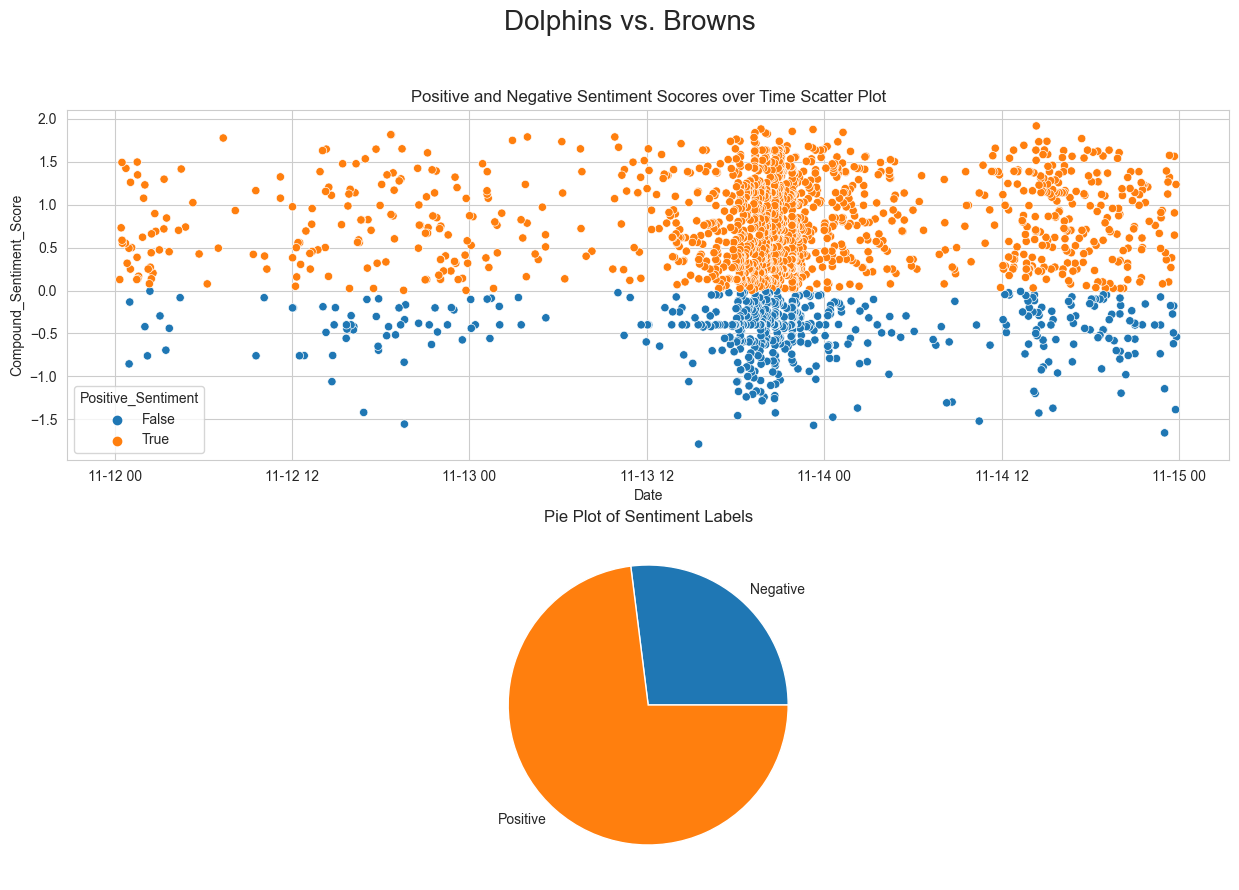

In [42]:
make_scatter_and_pie_figure(dolphins_dfs[0], 'Dolphins vs. Browns')

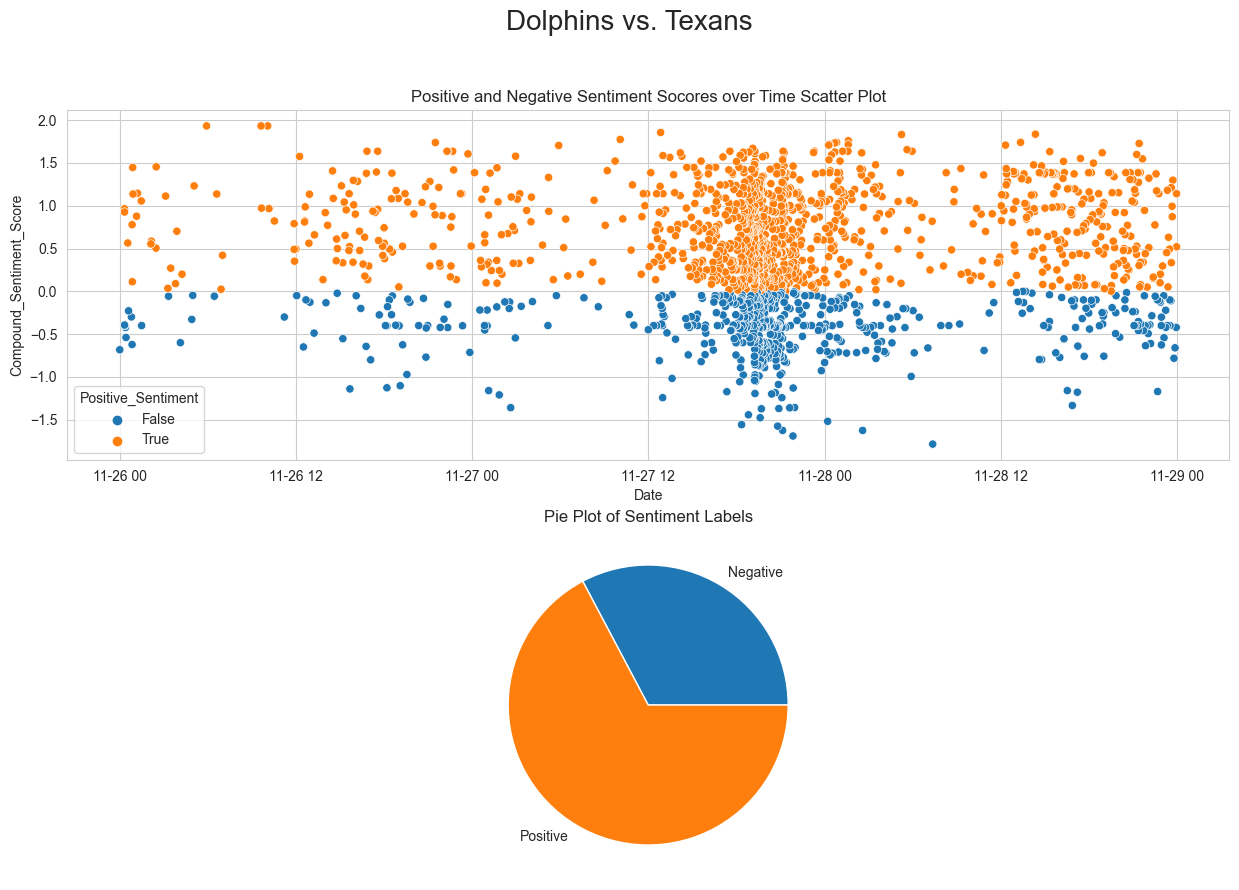

In [43]:
make_scatter_and_pie_figure(dolphins_dfs[1], 'Dolphins vs. Texans')

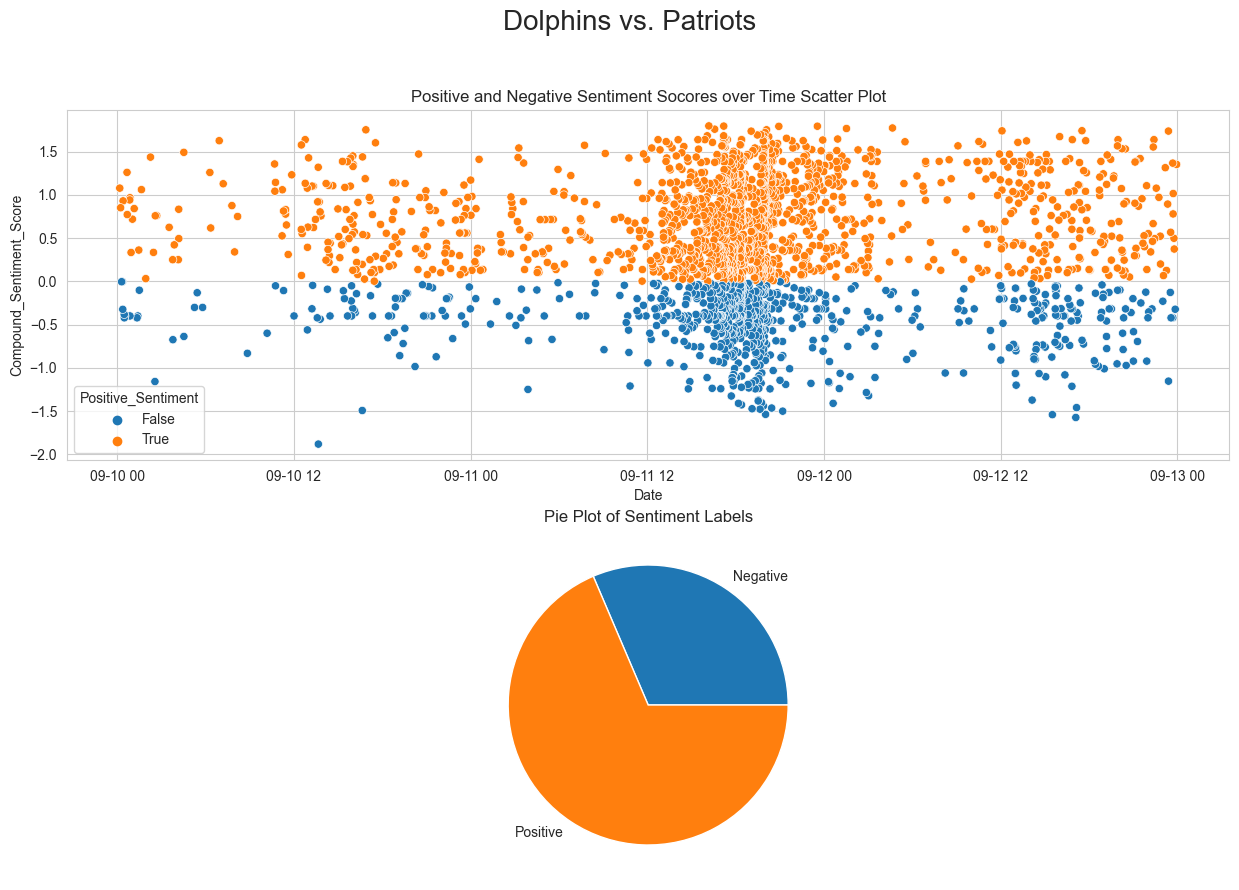

In [44]:
make_scatter_and_pie_figure(dolphins_dfs[2], 'Dolphins vs. Patriots')

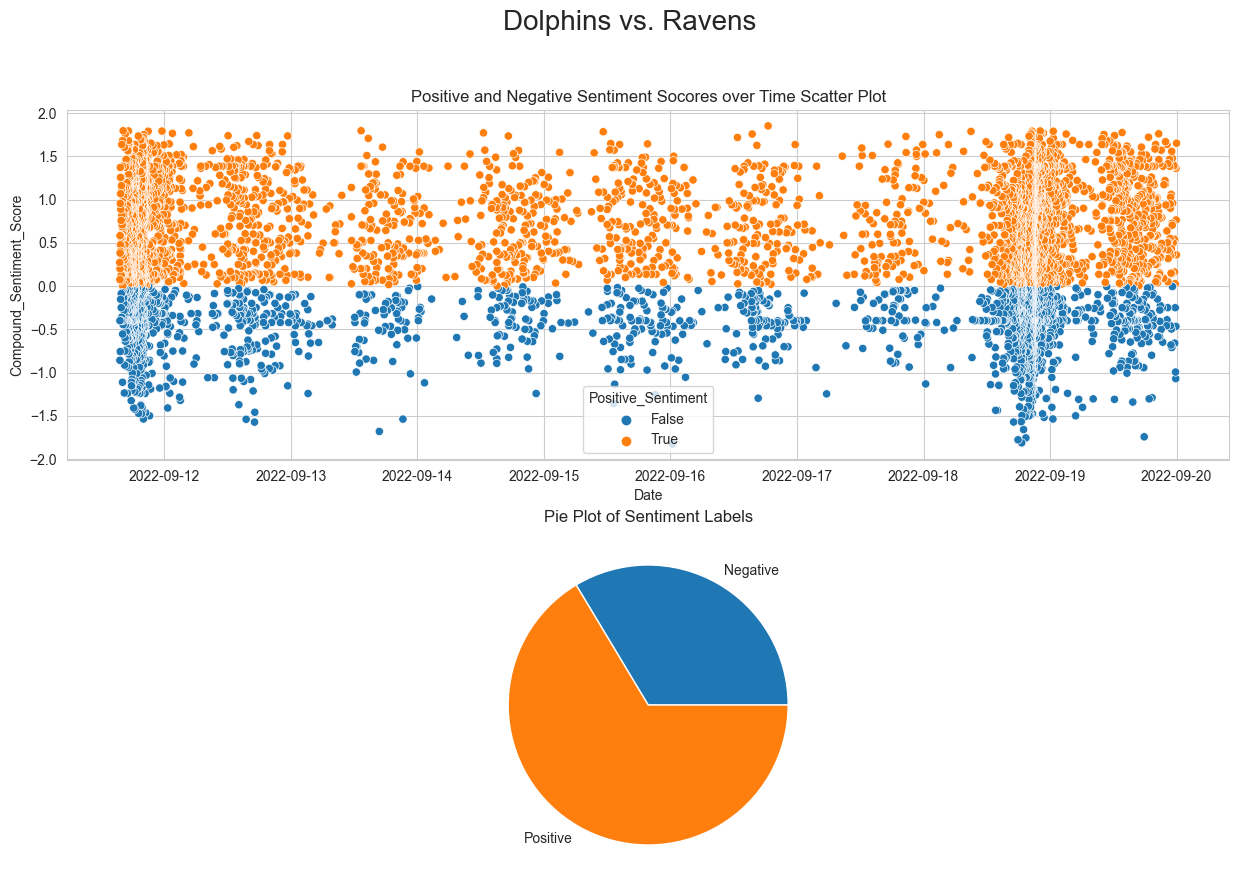

In [45]:
make_scatter_and_pie_figure(dolphins_dfs[3], 'Dolphins vs. Ravens')

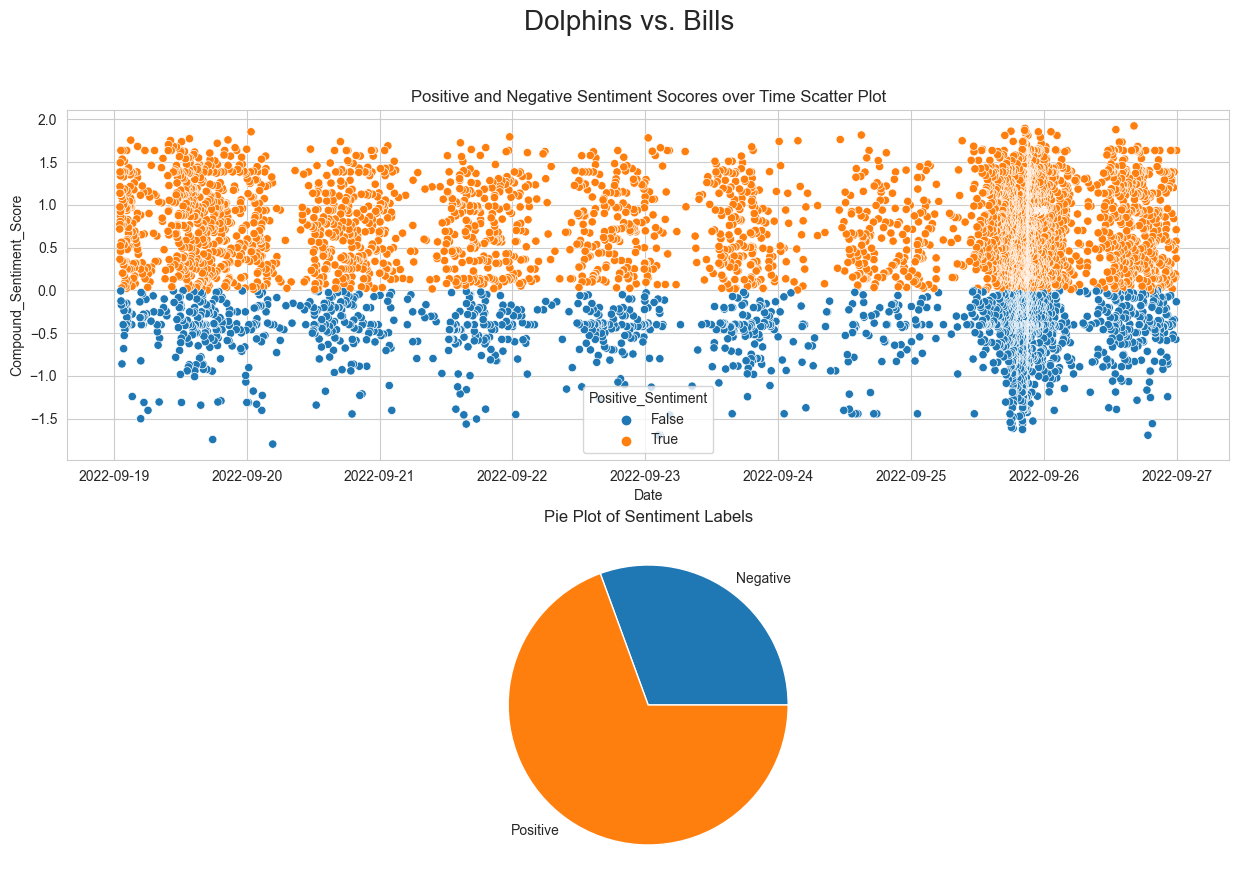

In [46]:
make_scatter_and_pie_figure(dolphins_dfs[4], 'Dolphins vs. Bills')

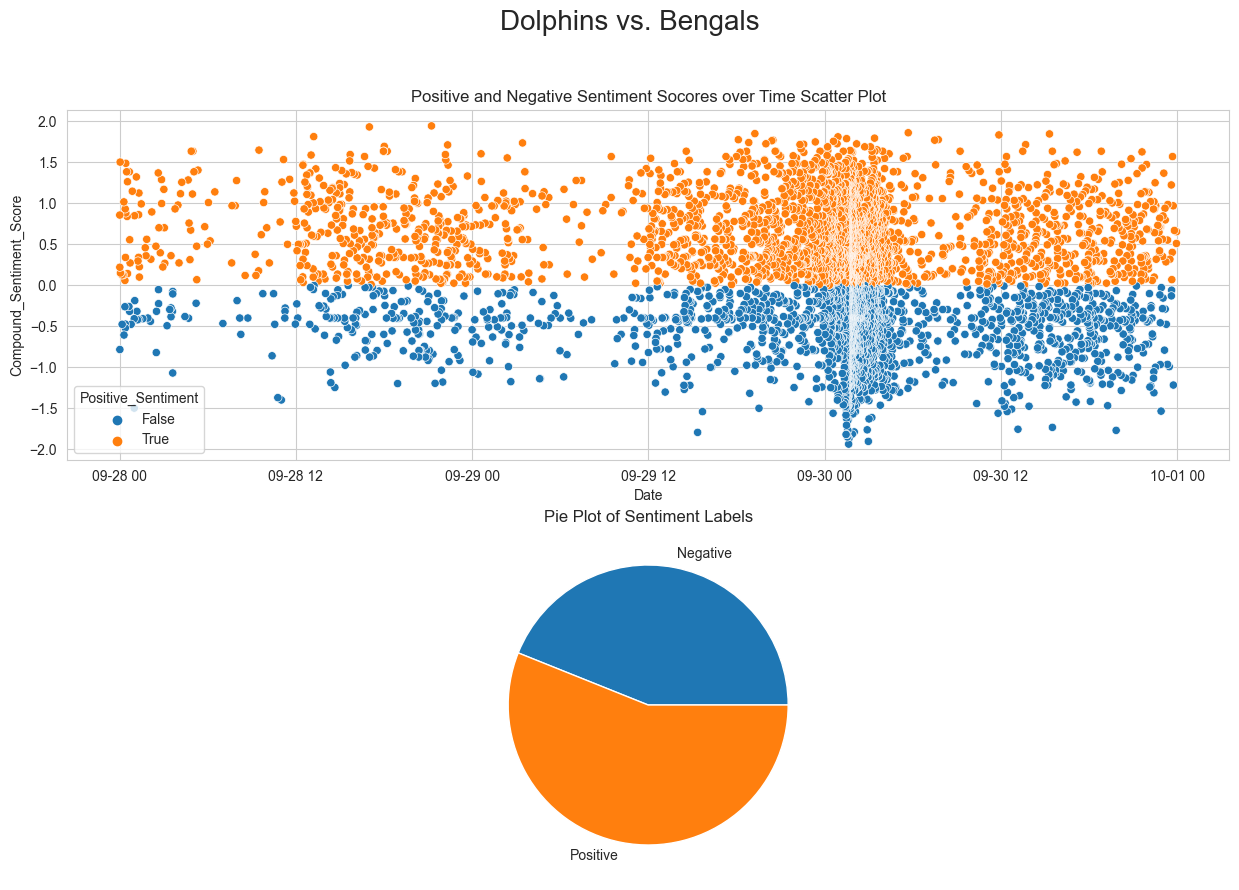

In [47]:
make_scatter_and_pie_figure(dolphins_dfs[5], 'Dolphins vs. Bengals')

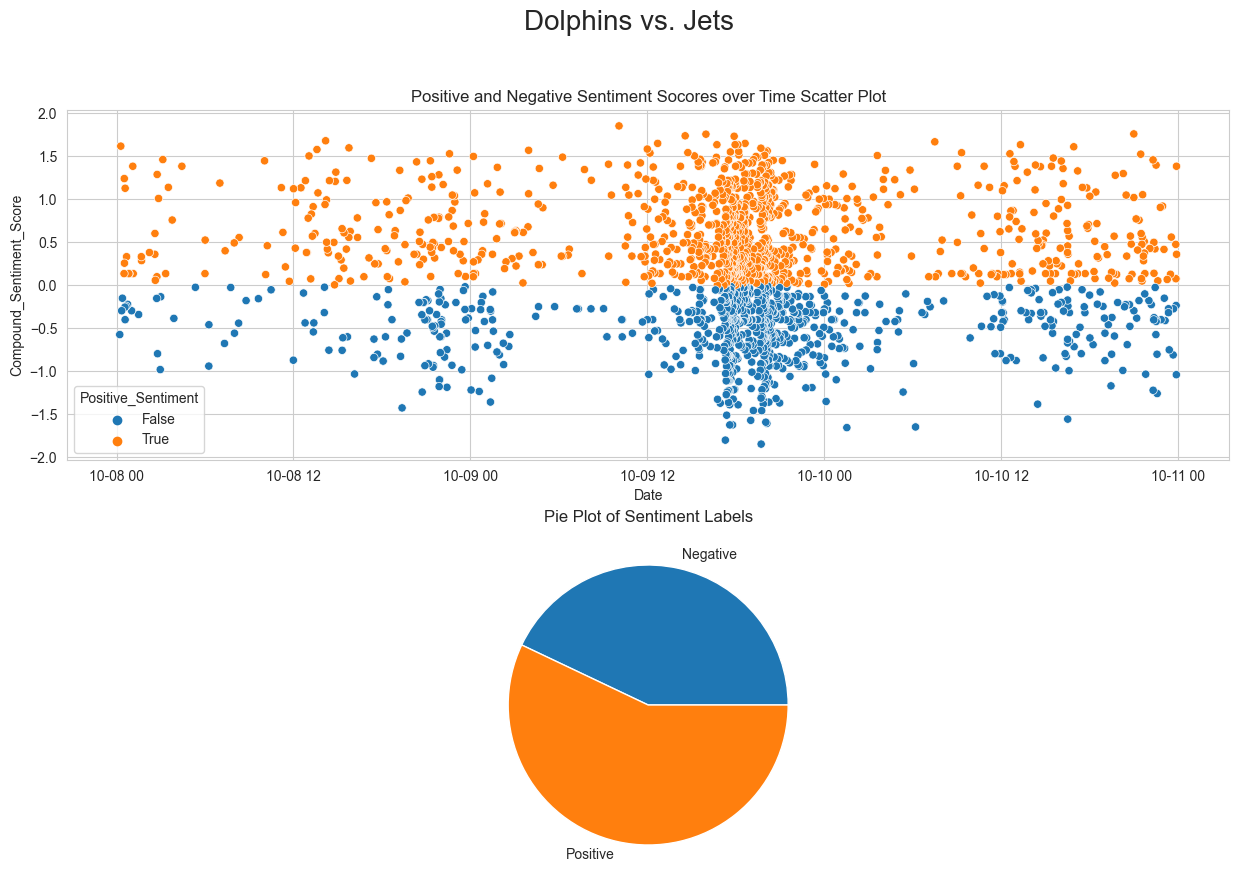

In [48]:
make_scatter_and_pie_figure(dolphins_dfs[6], 'Dolphins vs. Jets')

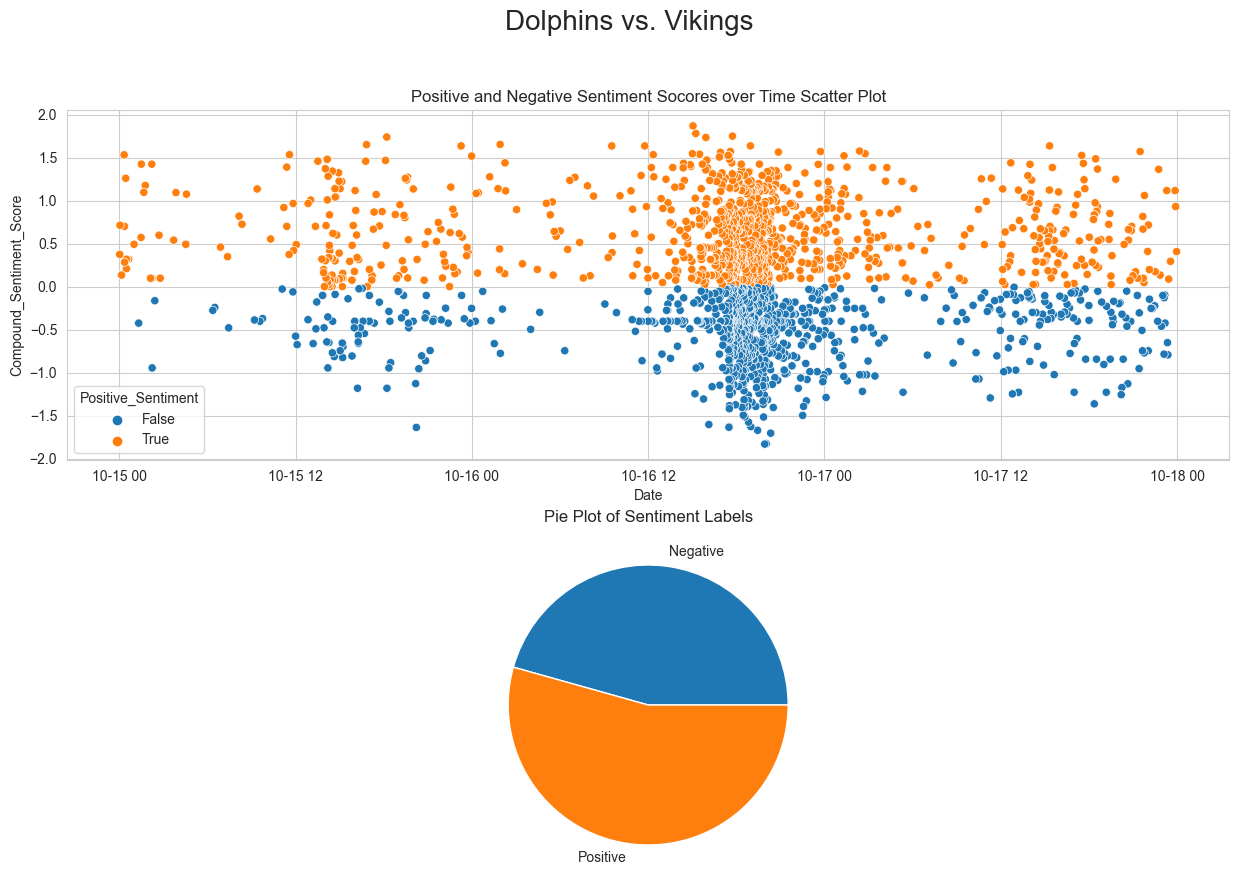

In [49]:
make_scatter_and_pie_figure(dolphins_dfs[7], 'Dolphins vs. Vikings')

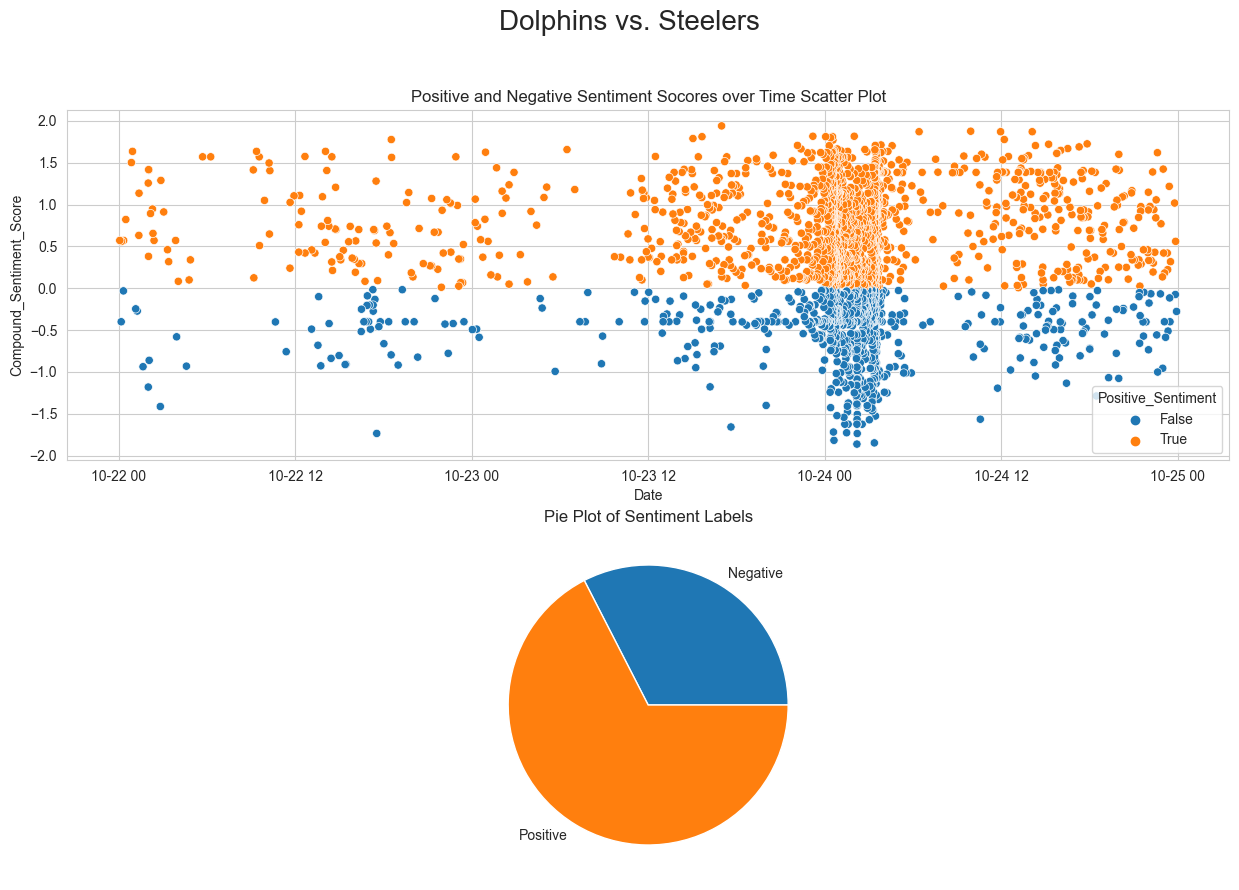

In [50]:
make_scatter_and_pie_figure(dolphins_dfs[8], 'Dolphins vs. Steelers')

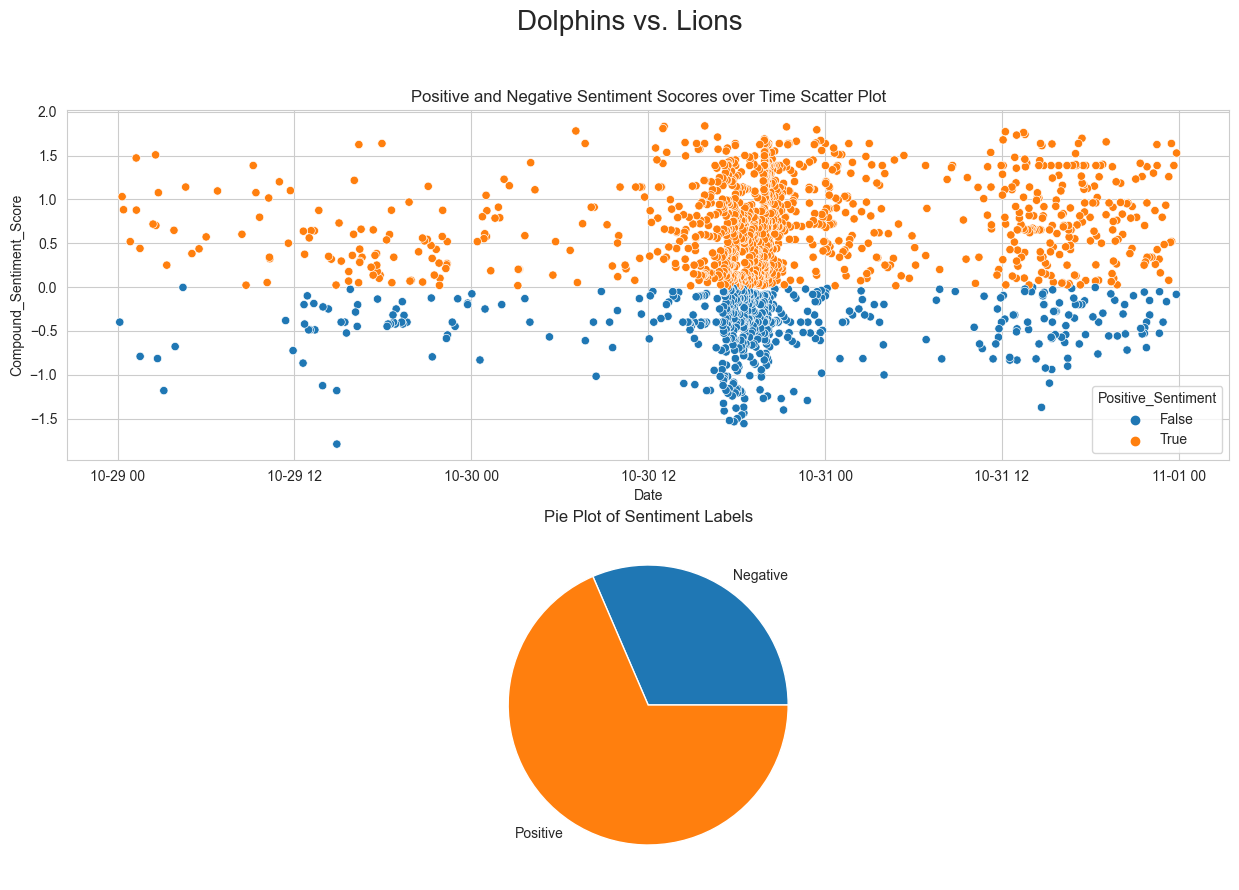

In [51]:
make_scatter_and_pie_figure(dolphins_dfs[9], 'Dolphins vs. Lions')

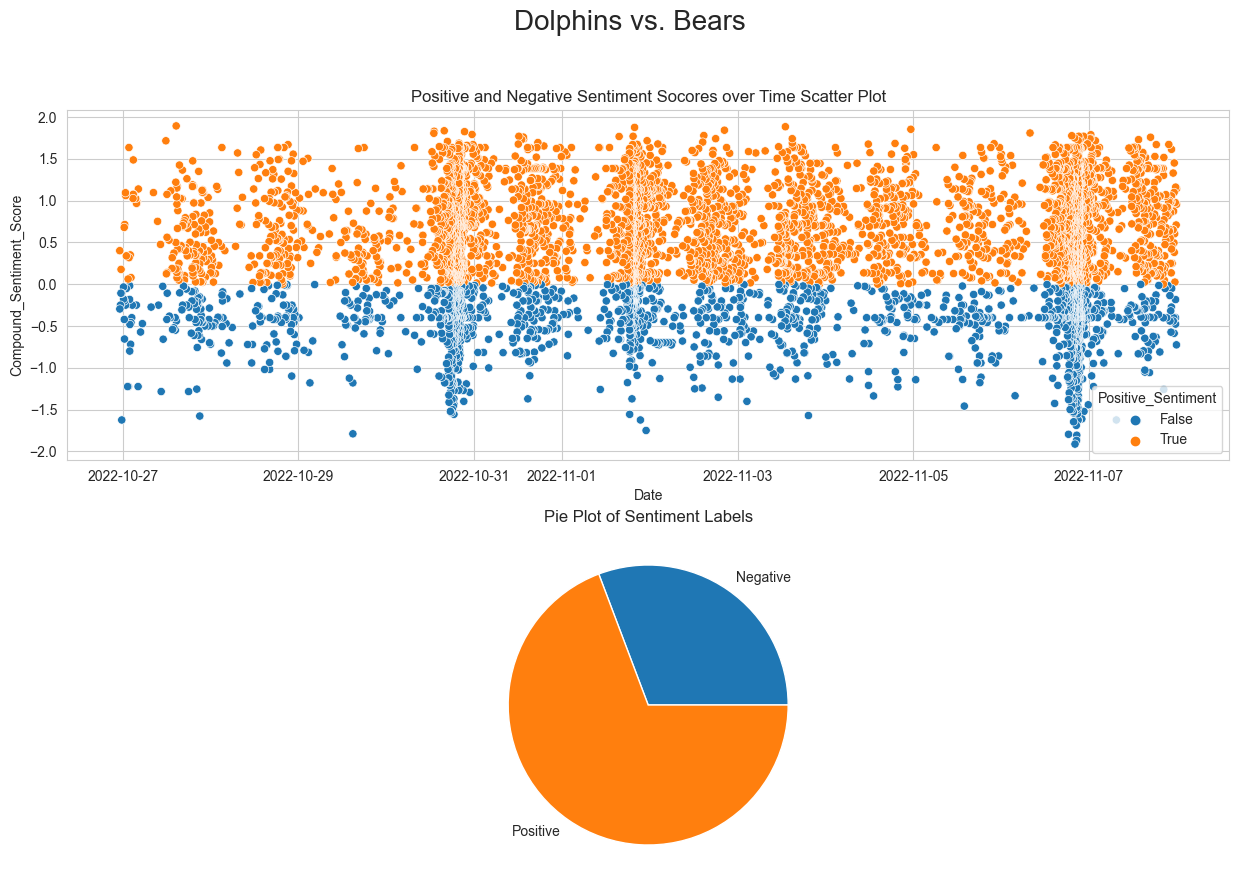

In [52]:
make_scatter_and_pie_figure(dolphins_dfs[10], 'Dolphins vs. Bears')

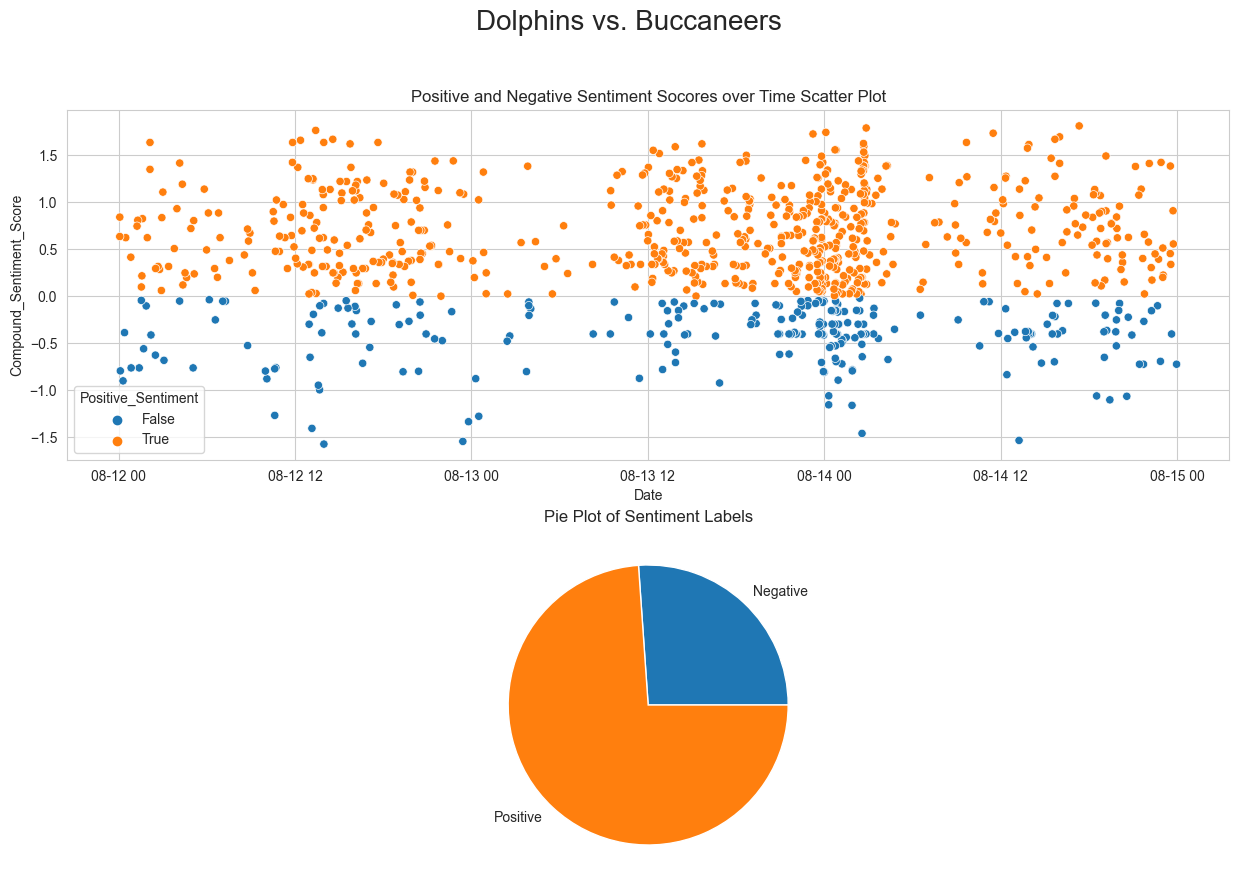

In [53]:
make_scatter_and_pie_figure(dolphins_dfs[11], 'Dolphins vs. Buccaneers')

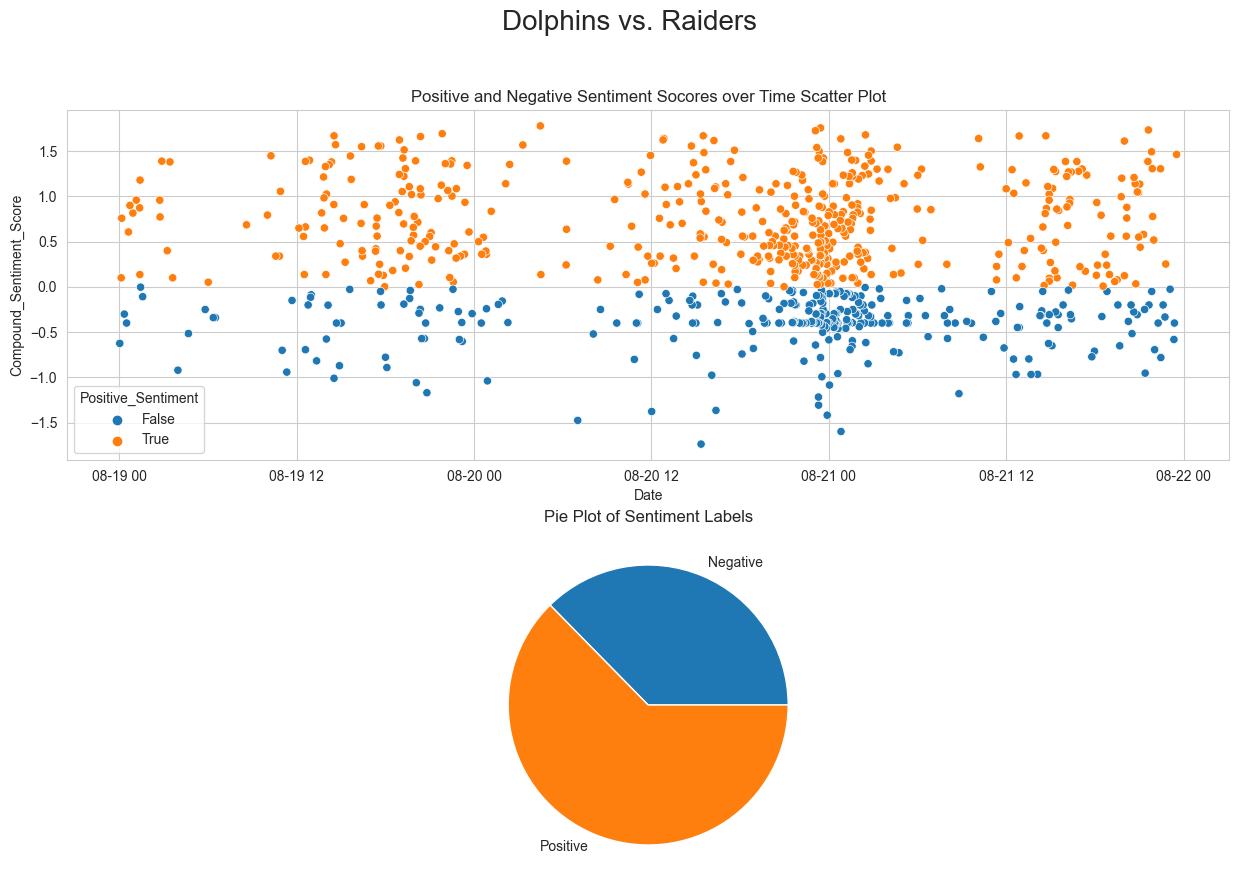

In [54]:
make_scatter_and_pie_figure(dolphins_dfs[12], 'Dolphins vs. Raiders')

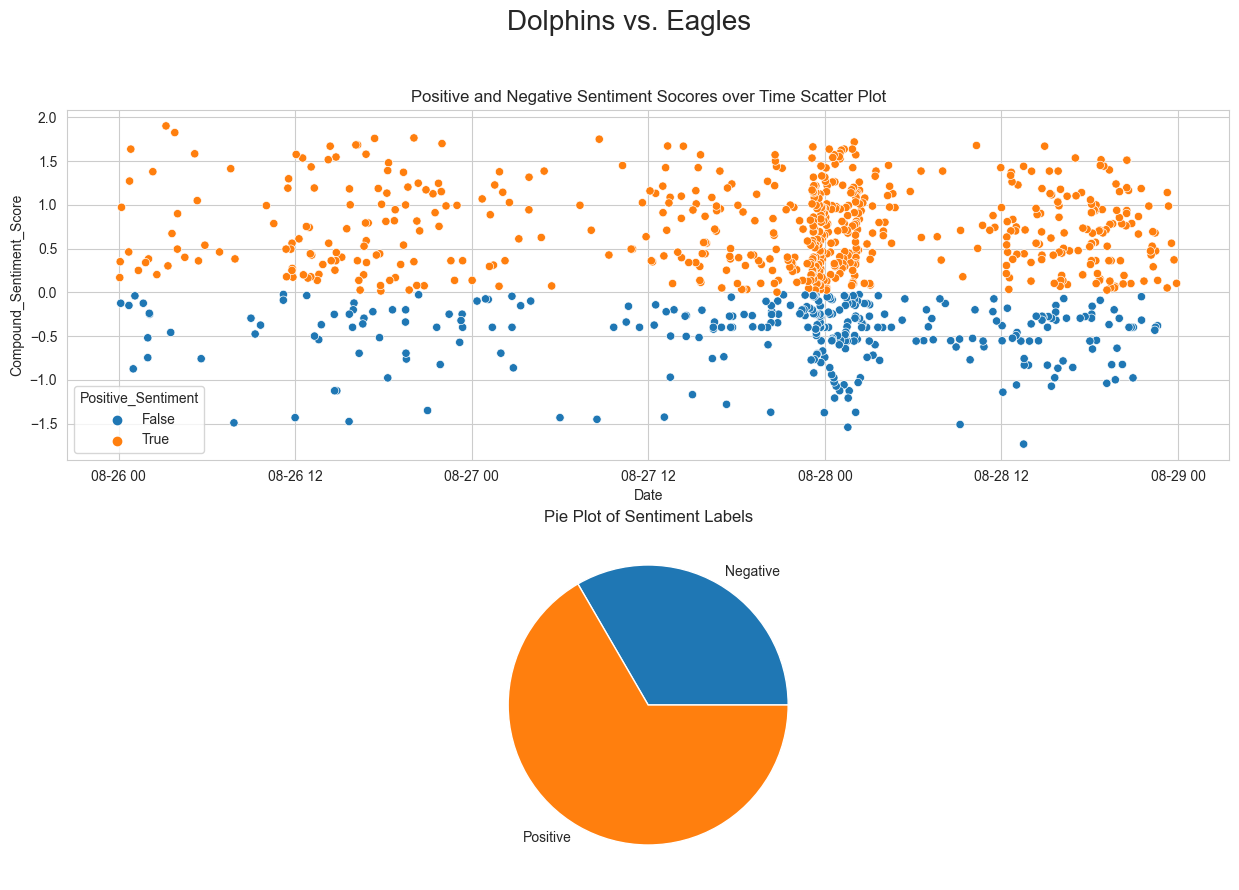

In [55]:
make_scatter_and_pie_figure(dolphins_dfs[13], 'Dolphins vs. Eagles')

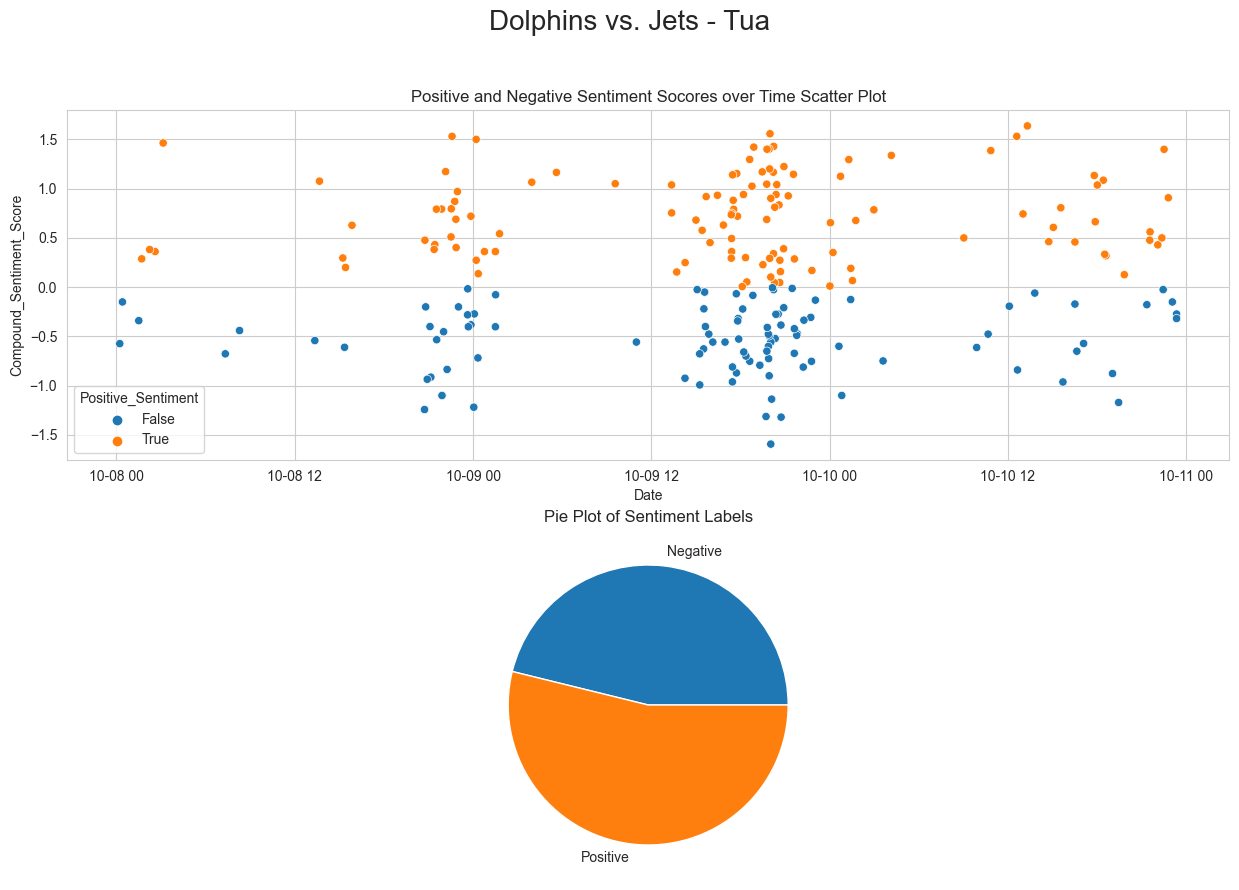

In [56]:
tua_df3 = dolphins_dfs[6].loc[dolphins_dfs[6]['clean_Tweet'].str.contains('tua')]
make_scatter_and_pie_figure(tua_df3, 'Dolphins vs. Jets - Tua')

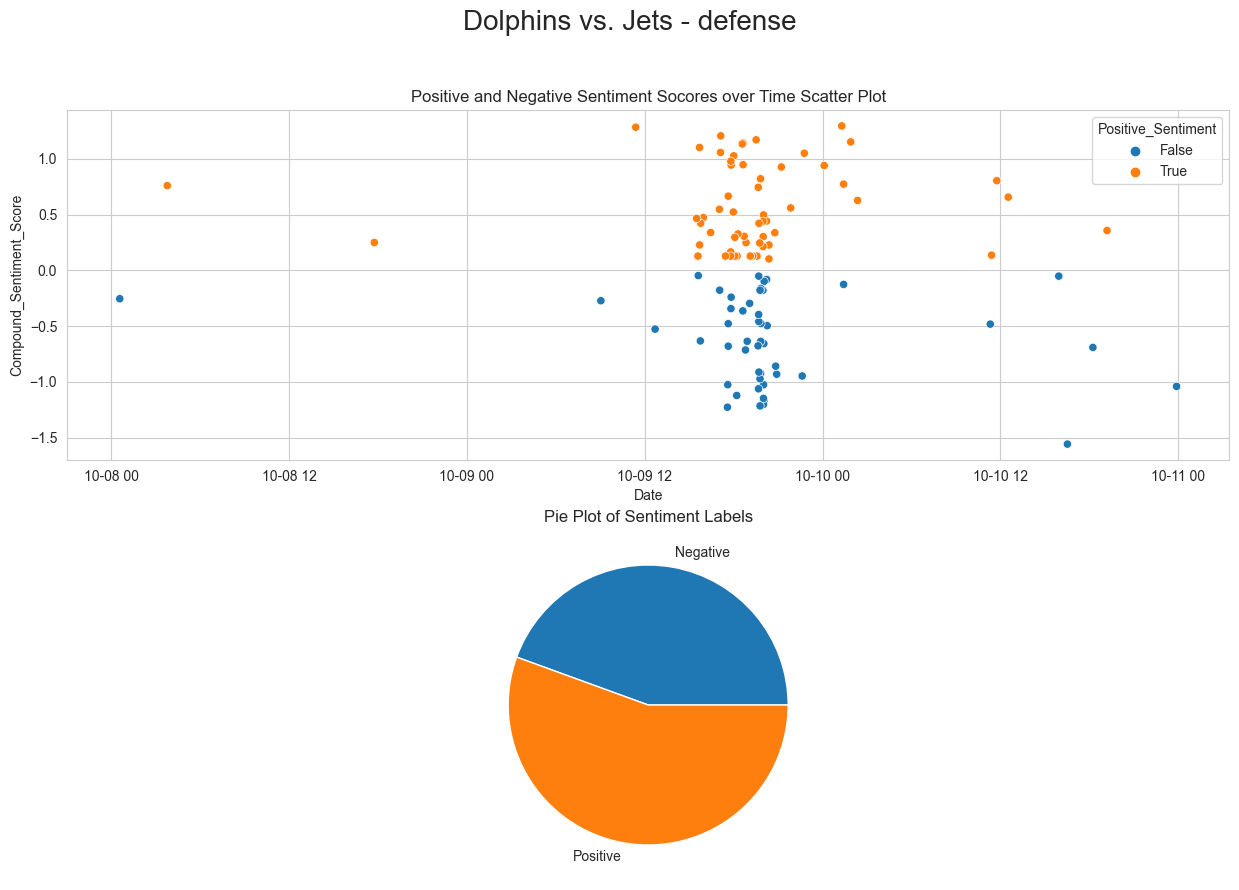

In [57]:
coach_df2 = dolphins_dfs[6].loc[dolphins_dfs[6]['clean_Tweet'].str.contains('defense')]
make_scatter_and_pie_figure(coach_df2, 'Dolphins vs. Jets - defense')